# Auto Inteligente

In [2]:
# -*- coding: utf-8 -*-
import socket
import cv2
import matplotlib.pyplot as plt
import time
import numpy as np

## Cliente Cámara

In [16]:
#import socket
#import cv2
#import numpy as np

host = '192.168.137.20'
port_camera = 8000

def get_image():
    socket_server = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    socket_server.connect((host, port_camera))
    conexion = socket_server.makefile('rb')
    stream = b''
    while True:
      stream += conexion.read(1024)
      first = stream.find(b'\xff\xd8')
      last = stream.find(b'\xff\xd9')
      if first != -1 and last != -1:
        break
    conexion.close()
    socket_server.close()
    jpg = stream[first:last+2]
    image = cv2.imdecode(np.frombuffer(jpg, dtype=np.uint8), cv2.IMREAD_COLOR)
    return image

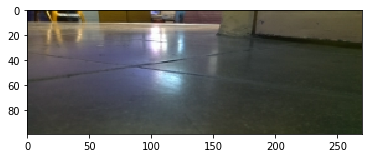

0.9129230976104736


In [24]:
imagenes = []
toc = time.time()
for i in range(1): 
    img = get_image()
    imagenes.append(img)
    plt.imshow(img)
    plt.show()
tic = time.time()
print (tic - toc)

In [19]:
#import socket
#import cv2
# import time
host = '192.168.137.20'
port_control = 8001

avan = b'100'
izq  = b'010'
der  = b'001'
stop = b'000'

def mover_auto(dircc):
    socket_server = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    socket_server.connect((host, port_control))
    socket_server.sendall(dircc)
    socket_server.close()
    time.sleep(0.15)

for i in range(50):
    mover_auto(avan)
    time.sleep(0.2)